<a href="https://colab.research.google.com/github/nattntn/AIPrototype2023/blob/main/Tensorflow_(Deep_Learning_Implementation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Sequential (ง่าย แต่สร้างได้แต่แบบไม่ซับซ้อน (วิ่งได้เเต่แบบเส้นตรง))
2. Functional (ยากขึ้นมาอีกนิด แต่สามารถปรับเส้นทาง ให้มีความซับซ้อนได้)
3. Subclassing (ยากสุด แต่สามารถแก้ไขได้ตามที่เราต้องการ)

# Sequential

## Import

In [ ]:
import tensorflow as tf # run
from tensorflow import keras #API / UI
from tensorflow.keras import layers

## Define

In [ ]:
# Define Sequential model witn 3 layers
model = keras.Sequential(
    [
     keras.Input(shape=(4,)),
     layers.Dense(2, activation="relu",name="layer1"),
     layers.Dense(3, activation="relu",name="layer2"),
     layers.Dense(5, activation="softmax",name="output")

    ]


)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 output (Dense)              (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ~Train (รวมกับการนำเข้าข้อมูลใน colab notebook หน้า)~

### predict

In [ ]:
# Call model on a test input
x = tf.ones((5,4)) # กลุ่มของ vector

In [ ]:
x # batch  = 5

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [ ]:
y = model(x)

In [ ]:
y

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0.25945824, 0.15012497, 0.1475853 , 0.16982327, 0.2730083 ],
       [0.25945824, 0.15012497, 0.1475853 , 0.16982327, 0.2730083 ],
       [0.25945824, 0.15012497, 0.1475853 , 0.16982327, 0.2730083 ],
       [0.25945824, 0.15012497, 0.1475853 , 0.16982327, 0.2730083 ],
       [0.25945824, 0.15012497, 0.1475853 , 0.16982327, 0.2730083 ]],
      dtype=float32)>

## สร้าง sequential แบบที่สอง

In [ ]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(5, activation="softmax"))

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_2 (Dense)             (None, 5)                 20        
                                                                 
Total params: 39 (156.00 Byte)
Trainable params: 39 (156.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## ปรับเปลี่ยน Network

In [ ]:
model2.pop() # add ใช้ pop หัวออก ได้ มันจะดึงชั้นสุดท้ายออกมา

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19 (76.00 Byte)
Trainable params: 19 (76.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model2.add(layers.Dense(6)) # add output new

In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[-0.09504431, -0.30980644, -0.05047086,  0.02702583,  0.5062735 ,
        -0.81330967],
       [-0.09504431, -0.30980644, -0.05047086,  0.02702583,  0.5062735 ,
        -0.81330967],
       [-0.09504431, -0.30980644, -0.05047086,  0.02702583,  0.5062735 ,
        -0.81330967],
       [-0.09504431, -0.30980644, -0.05047086,  0.02702583,  0.5062735 ,
        -0.81330967],
       [-0.09504431, -0.30980644, -0.05047086,  0.02702583,  0.5062735 ,
        -0.81330967]], dtype=float32)>

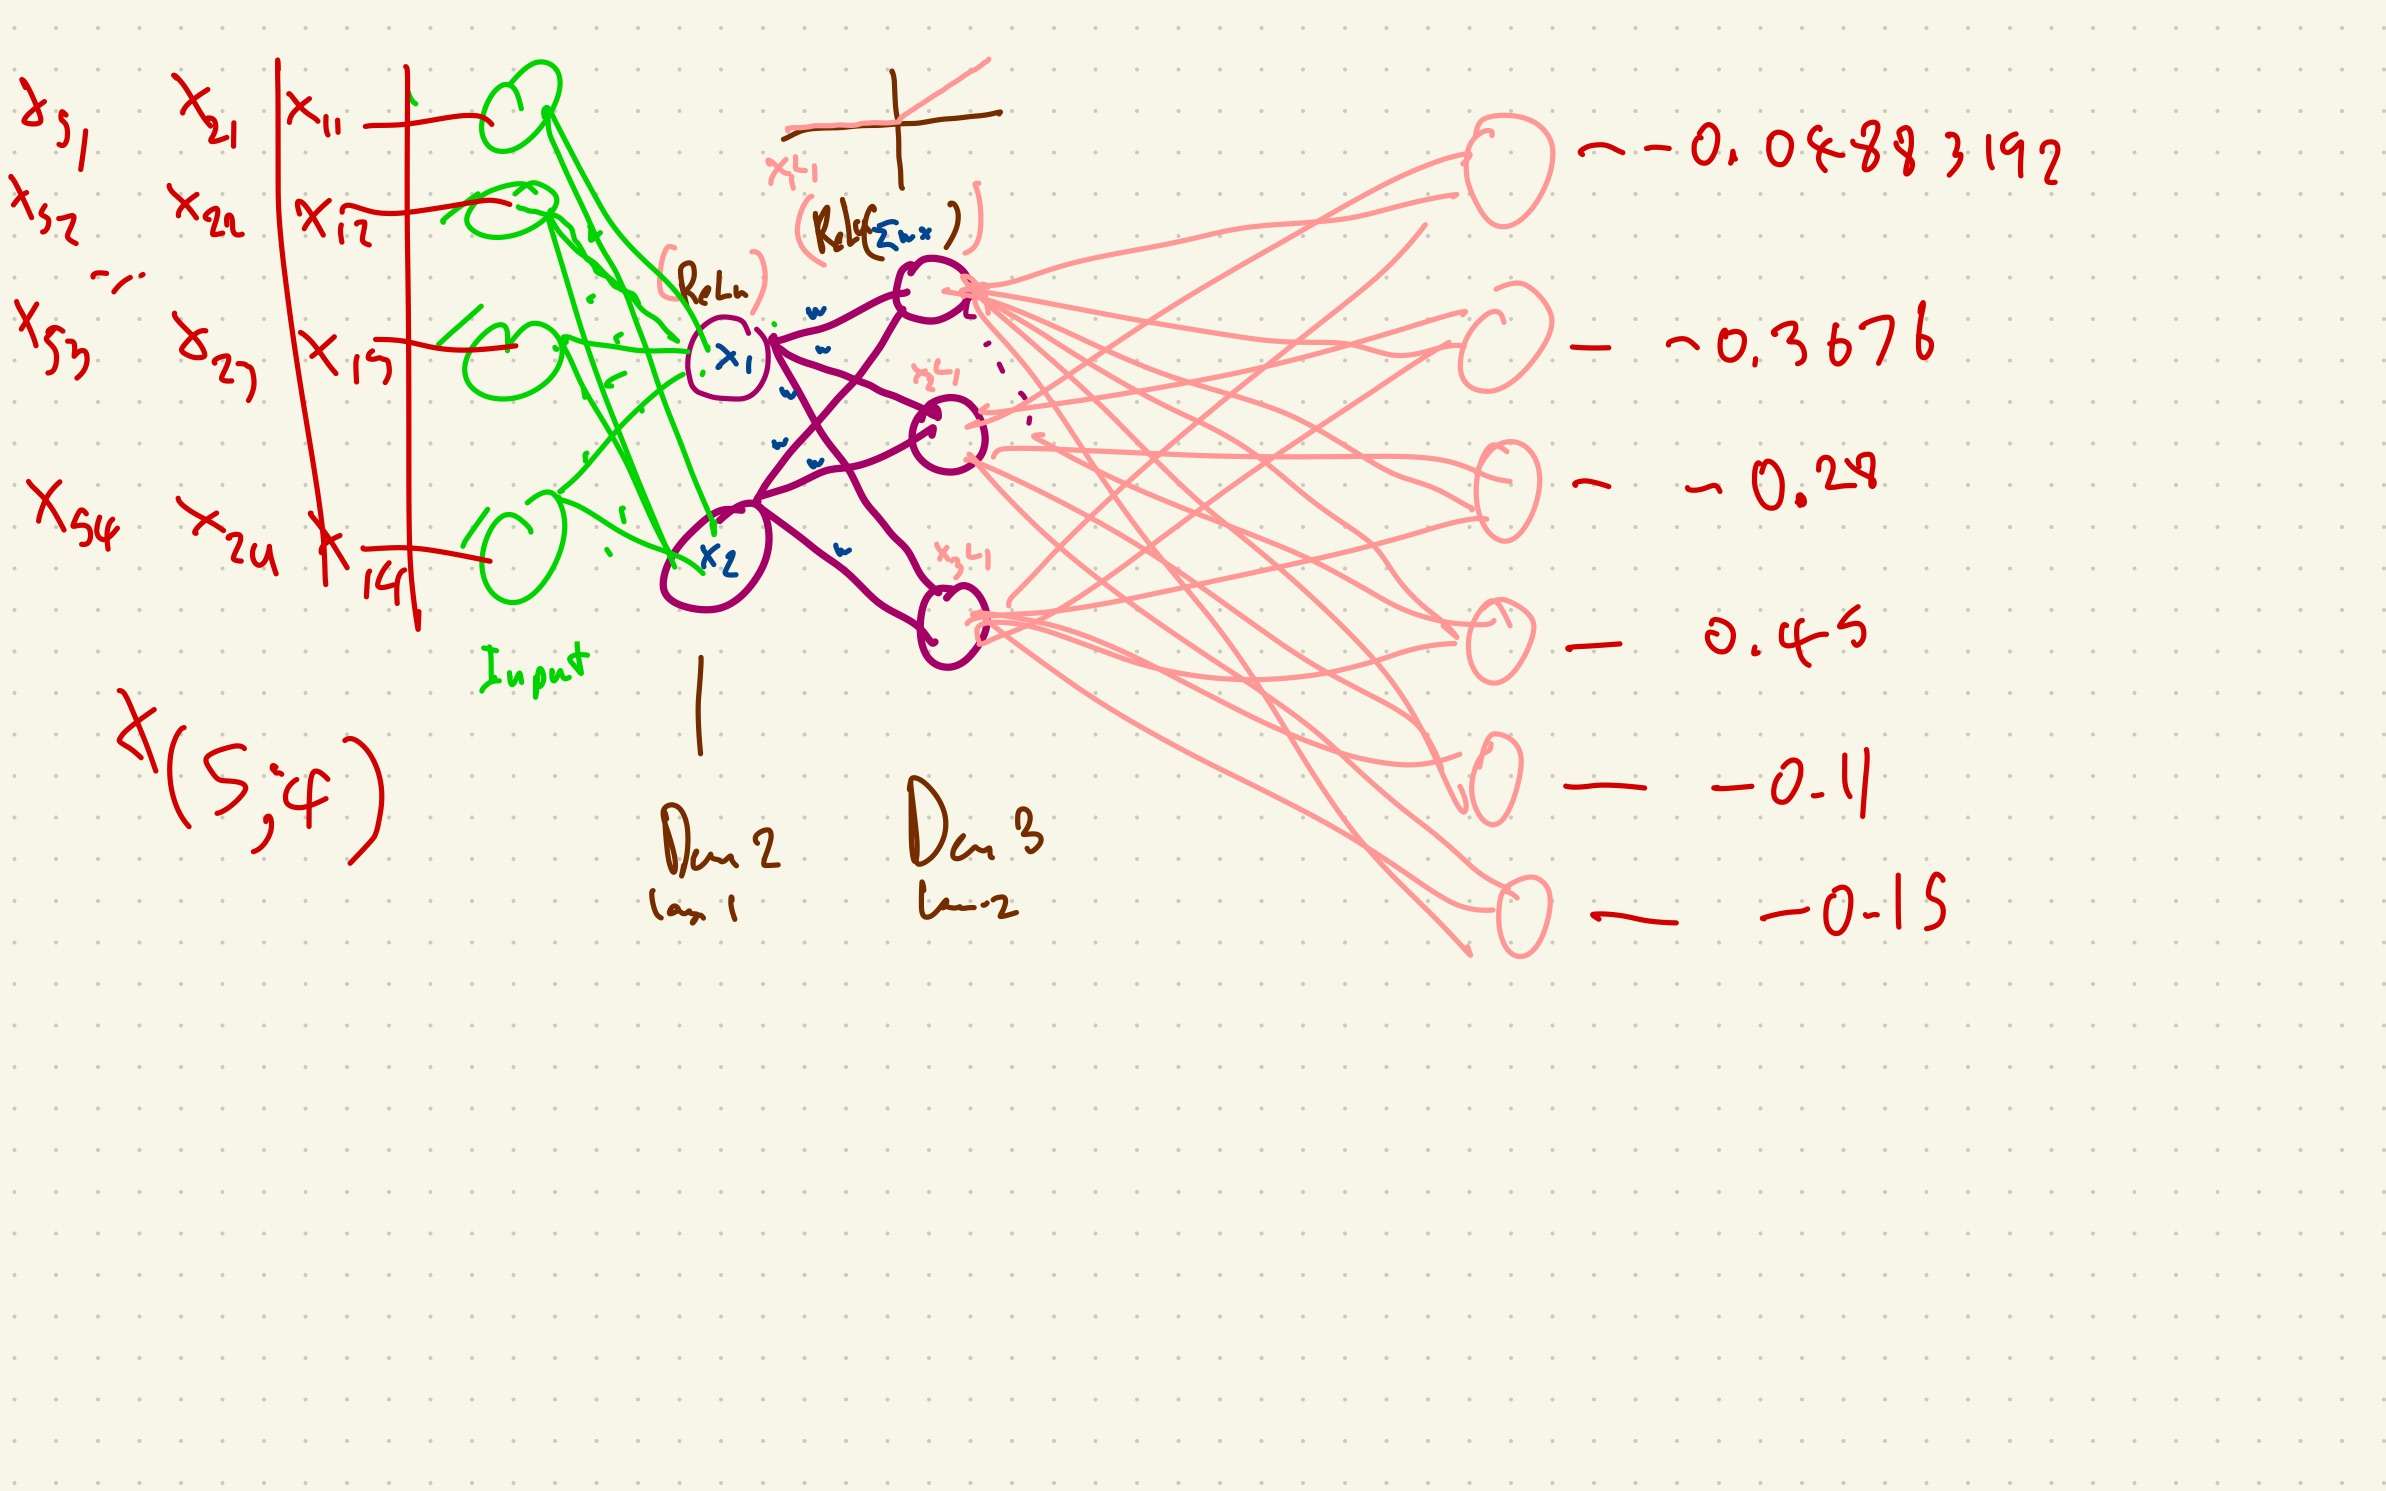

# ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

## load data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() #cifar10 มีความละเอียดต่ำ

### แปลงค่าเป็น 0-1 เพื่อนำเข้า network

ค่าจะเข้า network ได้ต้องอยู่ระหว่าง 0-1

In [ ]:
# Normalize pixel values to be between 0 and 1 // รูปปกติ 0-255 (ค่าสี)
train_images, test_images = train_images / 255.0, test_images / 255.0

### plot รูปตัวอย่าง

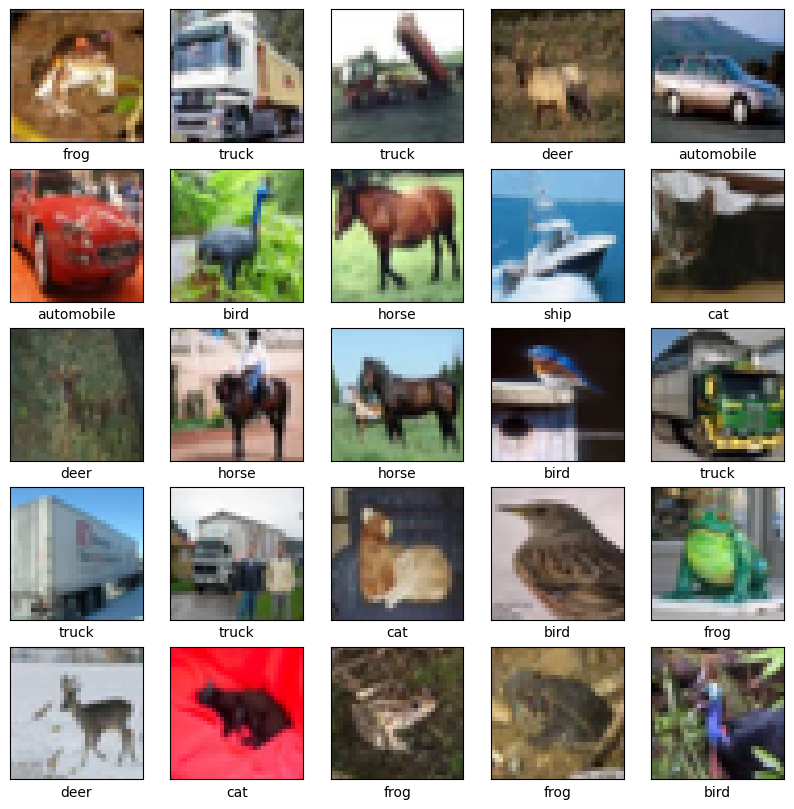

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) #Conv2D รับ input // ขอบจะหาย
model.add(layers.MaxPooling2D((2, 2))) # ดูทุก 2 pixel  แล้วนำมาสรุป layer เท่าเดิม ไม่มขนาด
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

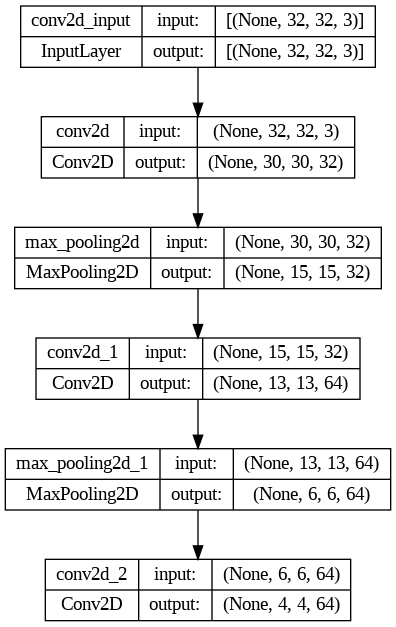

In [ ]:
keras.utils.plot_model(model,show_shapes=True)

### ต่อด้วย flatten และ dense เพื่อทำนาย

In [ ]:
model.add(layers.Flatten()) # ยืด input เป็นเส้นตรง
model.add(layers.Dense(64, activation='relu')) #FC
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

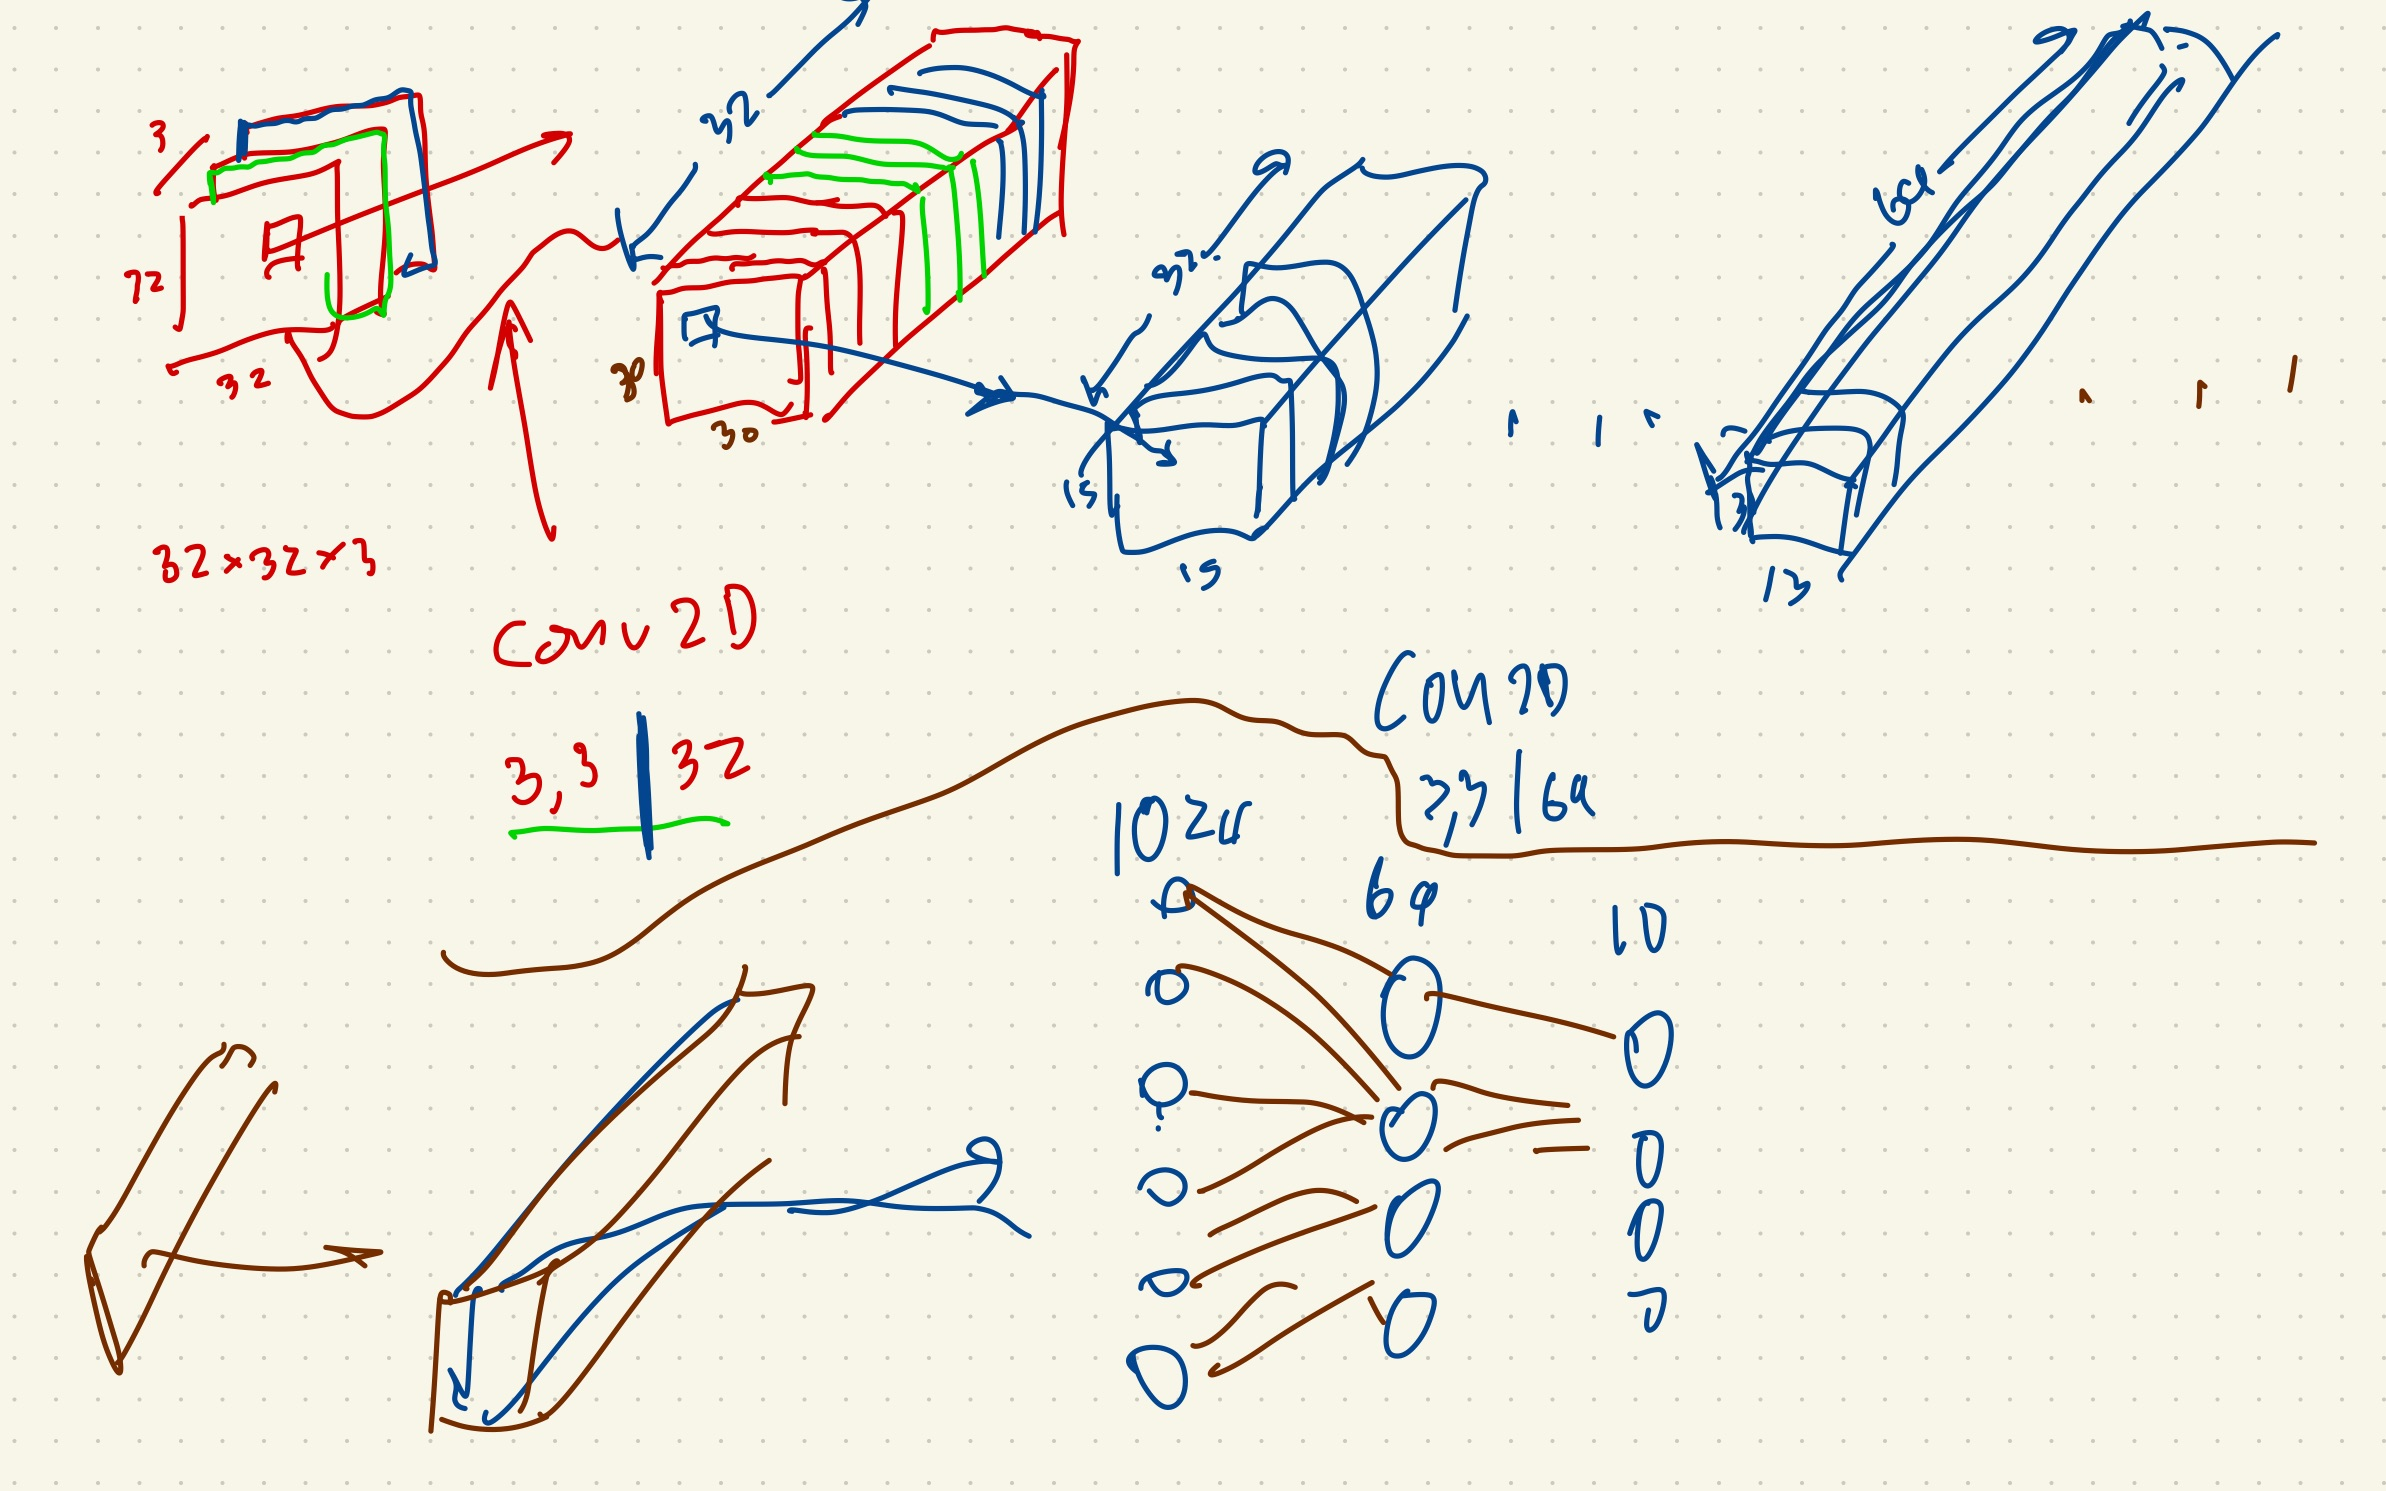

### Define training parameters

In [ ]:
model.compile(optimizer='adam', #optimizer ตัวบอกว่าจะวิ่งไปแบบไหน
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # loss output diff from in เท่าไหร่ แล้ว back กลับไป
              metrics=['accuracy']) #metrics วัดความแม่นยำ ไม่มีก็ได้

### Train

In [ ]:
train_labels # class

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
history = model.fit(train_images, train_labels, epochs=2, #(x(in),y(label))
                    validation_data=(test_images, test_labels))  #เอา ima ไหนมาวัด

Epoch 1/2
1563/1563 [==============================] - 87s 55ms/step - loss: 1.5044 - accuracy: 0.4531 - val_loss: 1.1947 - val_accuracy: 0.5728
Epoch 2/2
1563/1563 [==============================] - 82s 53ms/step - loss: 1.1379 - accuracy: 0.5977 - val_loss: 1.0663 - val_accuracy: 0.6218


### Test

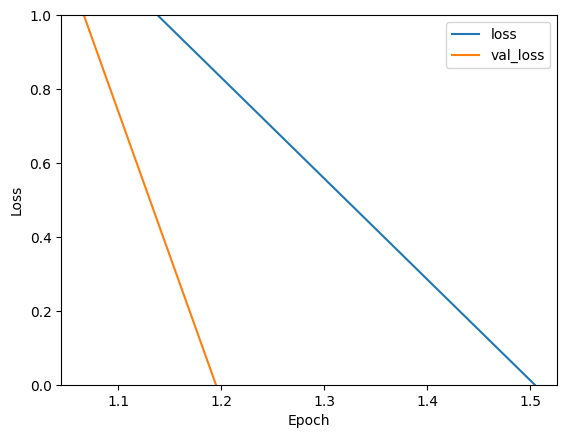

In [ ]:
plt.plot([0,1],history.history['loss'], label='loss')
plt.plot([0,1],history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right')

loss ลด  = model ใช้ได้

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 4s - loss: 1.0663 - accuracy: 0.6218 - 4s/epoch - 11ms/step


In [ ]:
print(test_acc)

0.6218000054359436


## Functional

แก้จาก network คนอื่นได้ ที่เคยเรียนรู้มาก่อนแล้ว

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

บอกว่าอะไรคือ input/ output ของแต่ละ layer

In [ ]:
input_images = keras.Input(shape=(32, 32, 3), name="img") # input shape shape=(32, 32, 3)
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก output  layer ก่อนหน้า
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)

In [ ]:
my_model = keras.Model(input_images, output, name = "mymodel")

In [ ]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

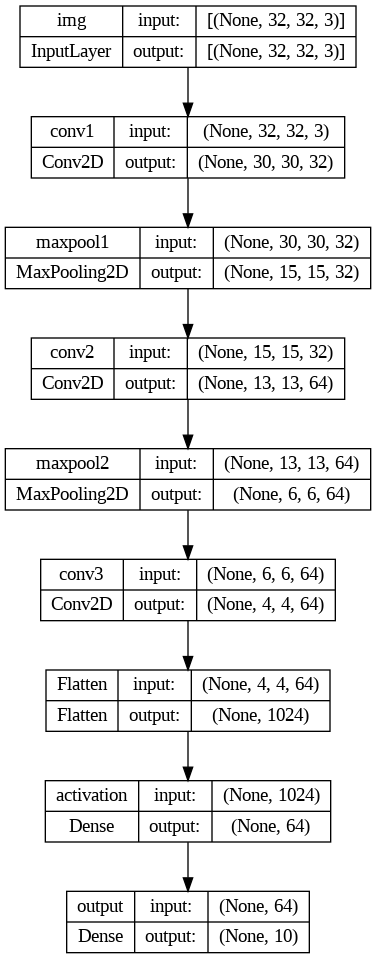

In [ ]:
keras.utils.plot_model(my_model, show_shapes=True)

In [ ]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = my_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 89s 56ms/step - loss: 1.5002 - accuracy: 0.4543 - val_loss: 1.2468 - val_accuracy: 0.5482
Epoch 2/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.1442 - accuracy: 0.5923 - val_loss: 1.0480 - val_accuracy: 0.6283
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 0.9943 - accuracy: 0.6522 - val_loss: 1.0479 - val_accuracy: 0.6323
Epoch 4/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9044 - accuracy: 0.6816 - val_loss: 0.9295 - val_accuracy: 0.6820
Epoch 5/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.8277 - accuracy: 0.7091 - val_loss: 1.0062 - val_accuracy: 0.6590
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7722 - accuracy: 0.7287 - val_loss: 0.8915 - val_accuracy: 0.6908
Epoch 7/10
1563/1563 [==============================] - 90s 58ms/step - loss: 0.7216 - accuracy: 0.7471 - val_loss: 0.8365 -

313/313 - 7s - loss: 0.8845 - accuracy: 0.7095 - 7s/epoch - 23ms/step


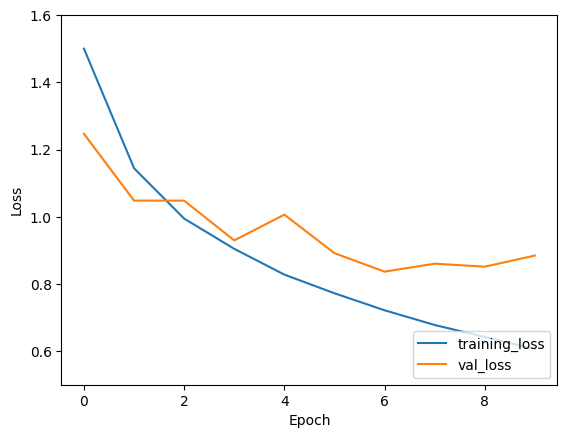

In [ ]:
plt.plot(range(10),history.history['loss'], label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.6])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7095000147819519


### ResNet

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output]) # รับ output ทั้งแบบปกติ และ ที่เป็น skip connection

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x) # sum ออกมาเป็นเส้นยาวๆ
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_3 (Conv2D)           (None, 30, 30, 32)           896       ['img[0][0]']                 
                                                                                                  
 conv2d_4 (Conv2D)           (None, 28, 28, 64)           18496     ['conv2d_3[0][0]']            
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 9, 9, 64)             0         ['conv2d_4[0][0]']            
 g2D)                                                                                    

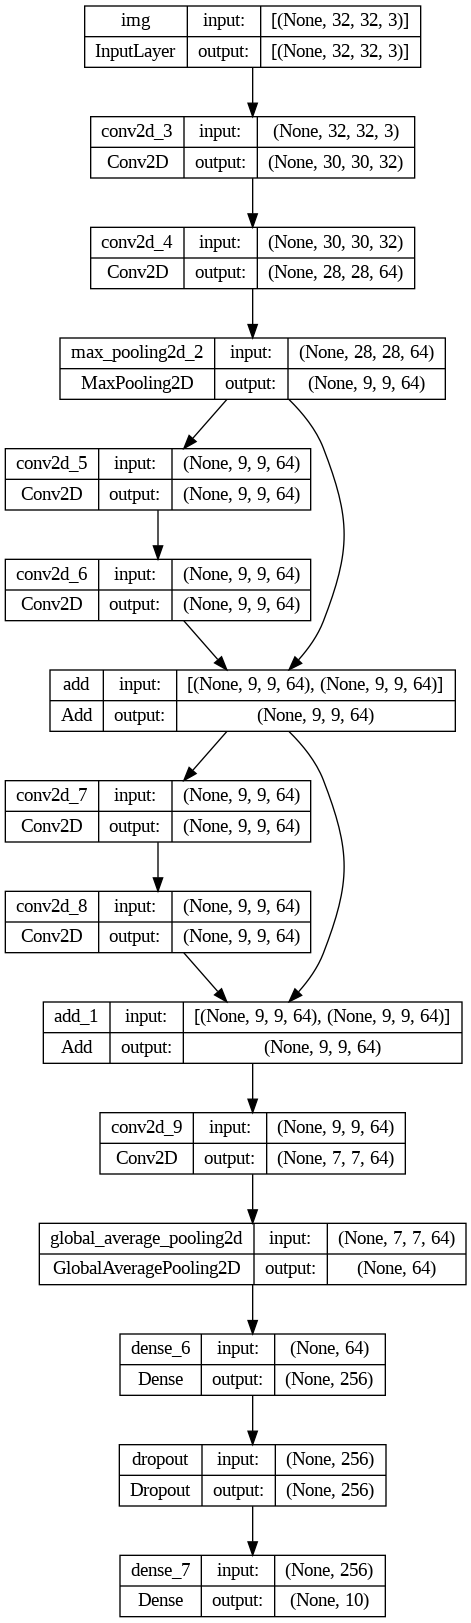

In [ ]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [ ]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1388/1563 [=========================>....] - ETA: 31s - loss: 1.7623 - accuracy: 0.3133

In [ ]:
plt.plot(range(10),history.history['loss'], label='training_loss')
plt.plot(range(10),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.5, 1.7])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

0.7192000150680542


# Tensorflow Data Pipeline  

flow from directory (สร้าง dataset เก็บแยก)

softmax

บอกว่า data อยู่ตรงไหน ดึงมาจากส่วนไหน

In [ ]:
import tensorflow as tf # run
from tensorflow import keras #API / UI
from tensorflow.keras import layers

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation='softmax')(x)

resnet = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 196, 196, 64)         18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 65, 65, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                 

In [ ]:
# data Pipeline 2 ส่วน 1. data augmentation 2.ระบุ path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2, #มุม
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#2.ระบุ path
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=16,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        color_mode= 'rgb')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
#label
labels = (train_generator.class_indices)
print(labels)

{'chihuahua': 0, 'muffin': 1}


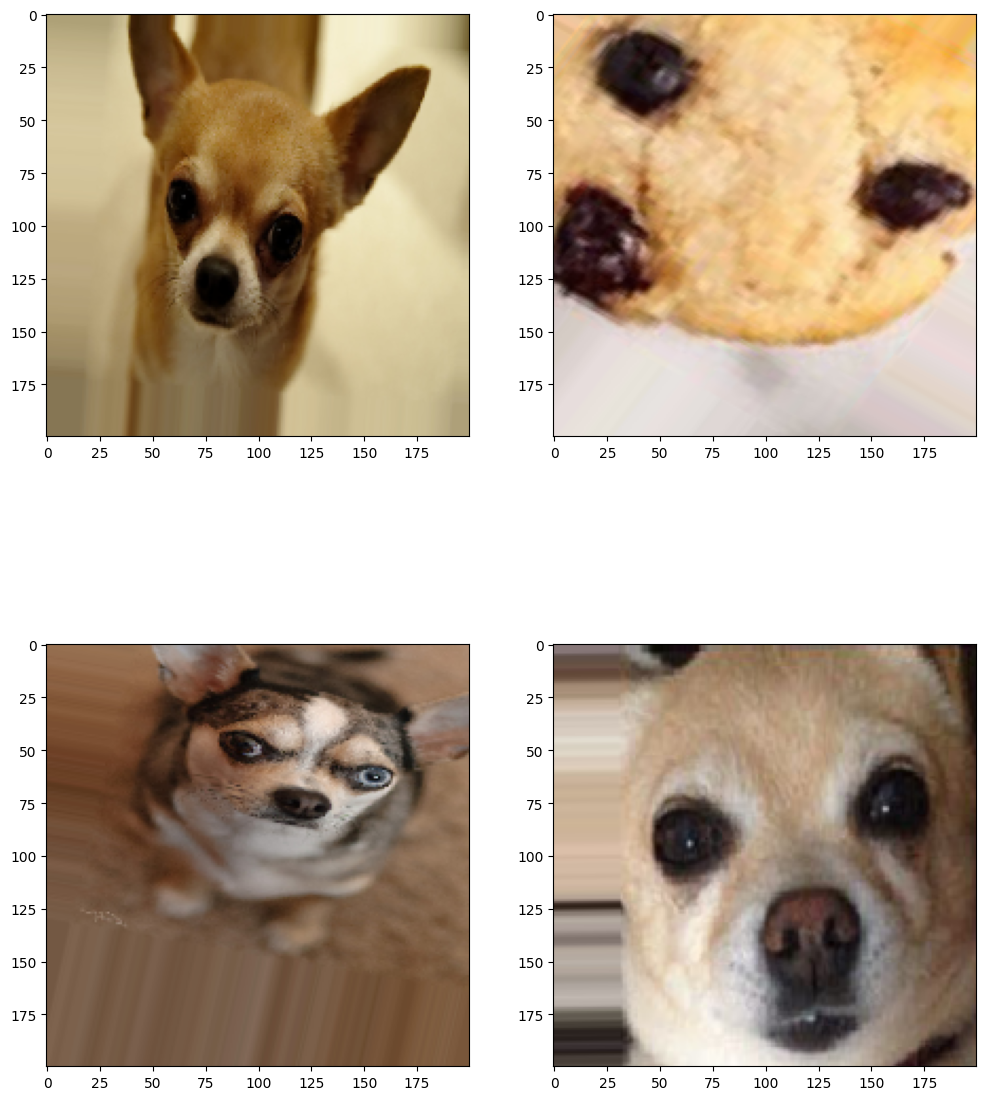

In [ ]:
import cv2
import PIL
from PIL import Image
# load data ที่ผ่านการทำ augmentation มาดู
%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 2
rows = 2
x, y = train_generator.next()
for i in range(0, columns*rows):
    image = x[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()

In [ ]:
train_generator

In [ ]:
path2data

'/content/drive/MyDrive/Classification Dataset'

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
history = resnet.fit_generator(
      train_generator,
      steps_per_epoch= 7, # data ไหล ผ่าน network 7 ครั้ง
      epochs=50,
      verbose=1,
      workers=4)

<ipython-input-13-f23829664552>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet.fit_generator(


Epoch 1/50
7/7 [==============================] - 13s 548ms/step - loss: 0.6941 - accuracy: 0.5385
Epoch 2/50
7/7 [==============================] - 2s 247ms/step - loss: 0.6912 - accuracy: 0.4528
Epoch 3/50
7/7 [==============================] - 2s 232ms/step - loss: 0.6804 - accuracy: 0.5283
Epoch 4/50
7/7 [==============================] - 3s 342ms/step - loss: 0.6900 - accuracy: 0.4717
Epoch 5/50
7/7 [==============================] - 2s 229ms/step - loss: 0.6951 - accuracy: 0.4717
Epoch 6/50
7/7 [==============================] - 2s 215ms/step - loss: 0.6802 - accuracy: 0.5288
Epoch 7/50
7/7 [==============================] - 2s 249ms/step - loss: 0.6724 - accuracy: 0.5849
Epoch 8/50
7/7 [==============================] - 2s 235ms/step - loss: 0.6700 - accuracy: 0.5377
Epoch 9/50
7/7 [==============================] - 2s 264ms/step - loss: 0.6674 - accuracy: 0.6604
Epoch 10/50
7/7 [==============================] - 2s 229ms/step - loss: 0.6357 - accuracy: 0.6827
Epoch 11/50
7/7 [=

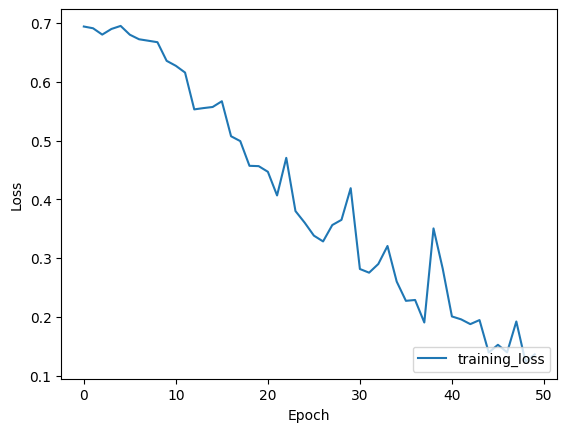

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
# plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

# test_loss, test_acc = resnet_model_dm.evaluate(train_datagen,  path2data, verbose=2)

# Softmax

flow from directory (สร้าง dataset เก็บแยก)

บอกว่า data อยู่ตรงไหน ดึงมาจากส่วนไหน

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation='softmax')(x)

resnet = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_15 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_14[0][0]']           
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_15[0][0]']           
 g2D)                                                                               

In [ ]:
# data Pipeline 2 ส่วน 1. data augmentation 2.ระบุ path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1, #มุม
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#2.ระบุ path
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=16,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        color_mode= 'rgb')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
#label
labels = (train_generator.class_indices)
print(labels)

{'chihuahua': 0, 'muffin': 1}


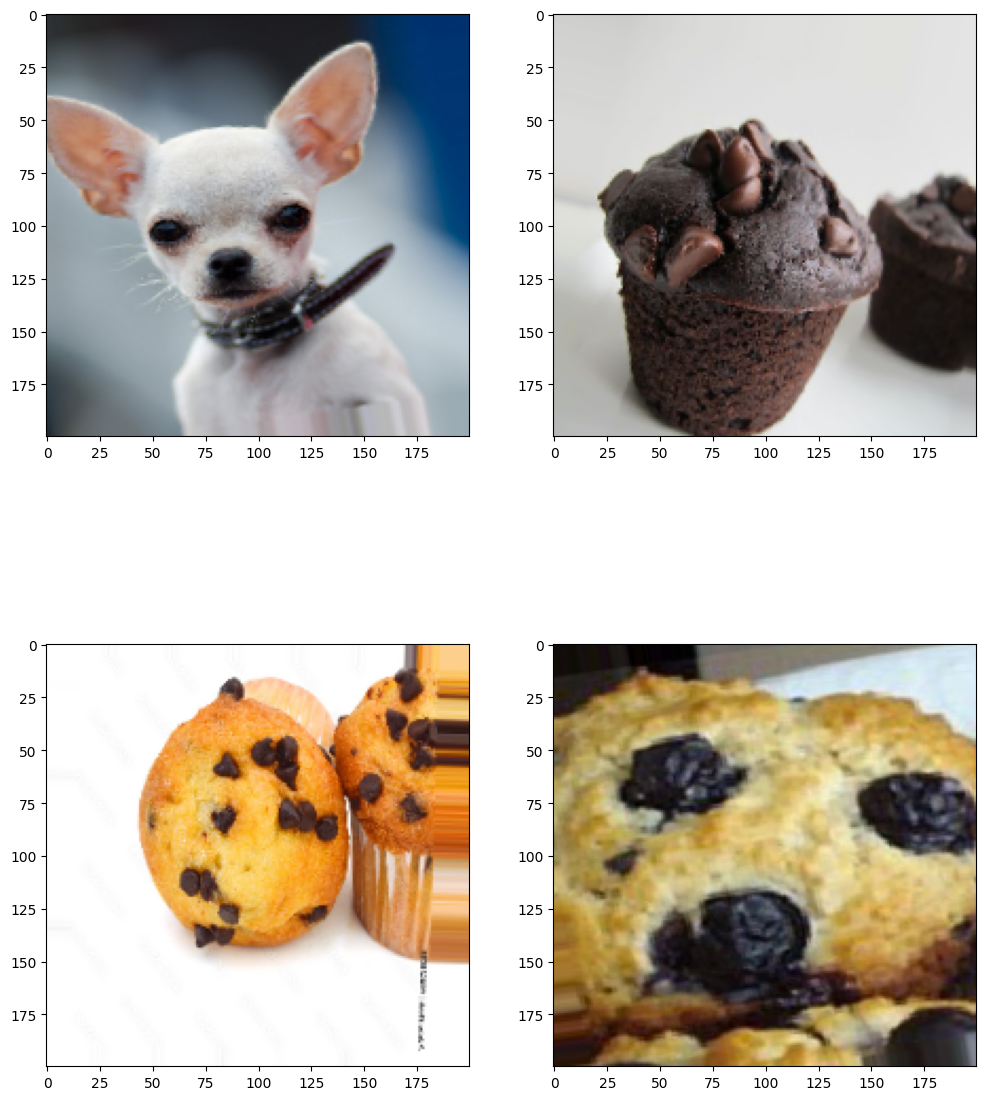

In [ ]:
import cv2
import PIL
from PIL import Image
# load data ที่ผ่านการทำ augmentation มาดู
%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 2
rows = 2
x, y = train_generator.next()
for i in range(0, columns*rows):
    image = x[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()

In [ ]:
train_generator

In [ ]:
path2data

'/content/drive/MyDrive/Classification Dataset'

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
history = resnet.fit_generator(
      train_generator,
      steps_per_epoch= 7, # data ไหล ผ่าน network 7 ครั้ง
      epochs=50,
      verbose=1,
      workers=4)

<ipython-input-56-f23829664552>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet.fit_generator(


Epoch 1/50
7/7 [==============================] - 5s 177ms/step - loss: 0.4216 - accuracy: 0.8585
Epoch 2/50
7/7 [==============================] - 2s 257ms/step - loss: 0.2338 - accuracy: 0.9231
Epoch 3/50
7/7 [==============================] - 2s 311ms/step - loss: 0.1630 - accuracy: 0.9519
Epoch 4/50
7/7 [==============================] - 2s 276ms/step - loss: 0.1826 - accuracy: 0.9519
Epoch 5/50
7/7 [==============================] - 2s 233ms/step - loss: 0.1094 - accuracy: 0.9904
Epoch 6/50
7/7 [==============================] - 2s 240ms/step - loss: 0.1213 - accuracy: 0.9808
Epoch 7/50
7/7 [==============================] - 3s 408ms/step - loss: 0.0935 - accuracy: 1.0000
Epoch 8/50
7/7 [==============================] - 2s 239ms/step - loss: 0.0626 - accuracy: 1.0000
Epoch 9/50
7/7 [==============================] - 2s 250ms/step - loss: 0.0755 - accuracy: 1.0000
Epoch 10/50
7/7 [==============================] - 2s 229ms/step - loss: 0.0688 - accuracy: 0.9906
Epoch 11/50
7/7 [==

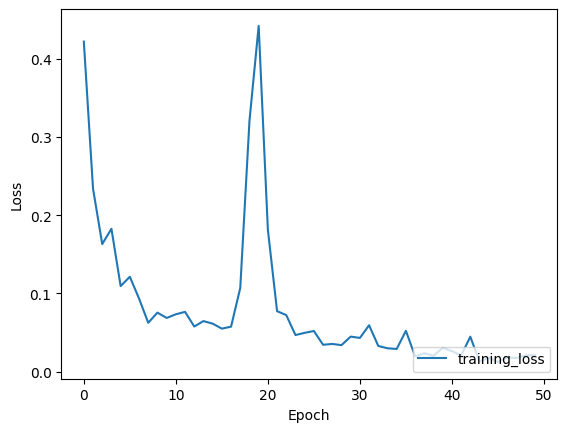

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
# plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

# test_loss, test_acc = resnet_model_dm.evaluate(train_datagen,  path2data, verbose=2)

# Softmax

flow from directory (สร้าง dataset เก็บแยก)

บอกว่า data อยู่ตรงไหน ดึงมาจากส่วนไหน

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2, activation='softmax')(x)

resnet = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_14 (Conv2D)          (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_15 (Conv2D)          (None, 196, 196, 64)         18496     ['conv2d_14[0][0]']           
                                                                                                  
 max_pooling2d_2 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_15[0][0]']           
 g2D)                                                                               

In [ ]:
# data Pipeline 2 ส่วน 1. data augmentation 2.ระบุ path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

#2.ระบุ path
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=16,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        color_mode= 'rgb')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
#label
labels = (train_generator.class_indices)
print(labels)

{'chihuahua': 0, 'muffin': 1}


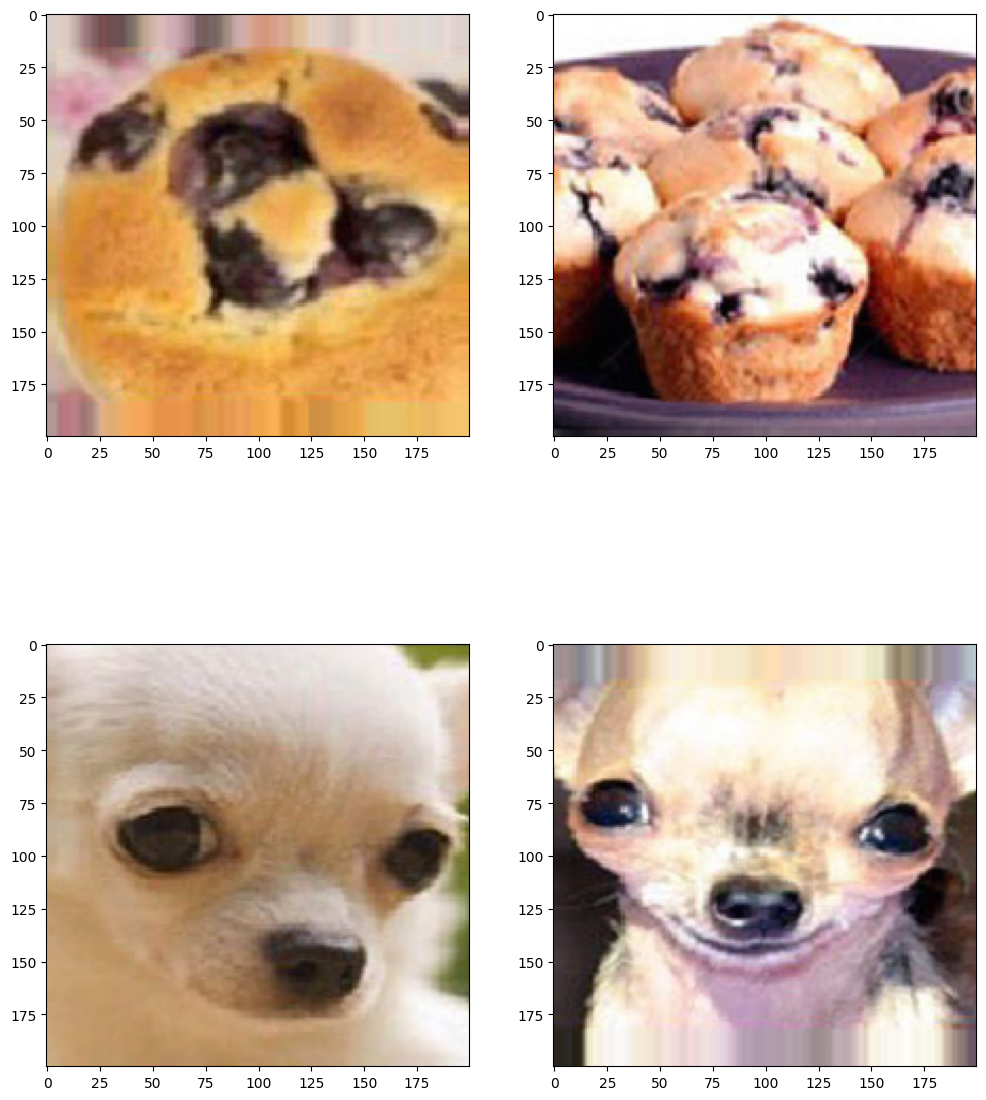

In [ ]:
import cv2
import PIL
from PIL import Image
# load data ที่ผ่านการทำ augmentation มาดู
%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 2
rows = 2
x, y = train_generator.next()
for i in range(0, columns*rows):
    image = x[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()

In [ ]:
train_generator

In [ ]:
path2data

'/content/drive/MyDrive/Classification Dataset'

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
history = resnet.fit_generator(
      train_generator,
      steps_per_epoch= 7, # data ไหล ผ่าน network 7 ครั้ง
      epochs=50,
      verbose=1,
      workers=4)

<ipython-input-25-f23829664552>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet.fit_generator(


Epoch 1/50
7/7 [==============================] - 4s 176ms/step - loss: 0.2665 - accuracy: 0.8750
Epoch 2/50
7/7 [==============================] - 2s 206ms/step - loss: 0.1607 - accuracy: 0.9327
Epoch 3/50
7/7 [==============================] - 2s 221ms/step - loss: 0.1109 - accuracy: 0.9717
Epoch 4/50
7/7 [==============================] - 2s 238ms/step - loss: 0.1096 - accuracy: 0.9717
Epoch 5/50
7/7 [==============================] - 3s 303ms/step - loss: 0.1006 - accuracy: 0.9712
Epoch 6/50
7/7 [==============================] - 2s 205ms/step - loss: 0.0750 - accuracy: 0.9808
Epoch 7/50
7/7 [==============================] - 2s 221ms/step - loss: 0.0642 - accuracy: 0.9906
Epoch 8/50
7/7 [==============================] - 2s 235ms/step - loss: 0.0702 - accuracy: 0.9904
Epoch 9/50
7/7 [==============================] - 2s 239ms/step - loss: 0.0818 - accuracy: 0.9623
Epoch 10/50
7/7 [==============================] - 3s 306ms/step - loss: 0.1091 - accuracy: 0.9519
Epoch 11/50
7/7 [==

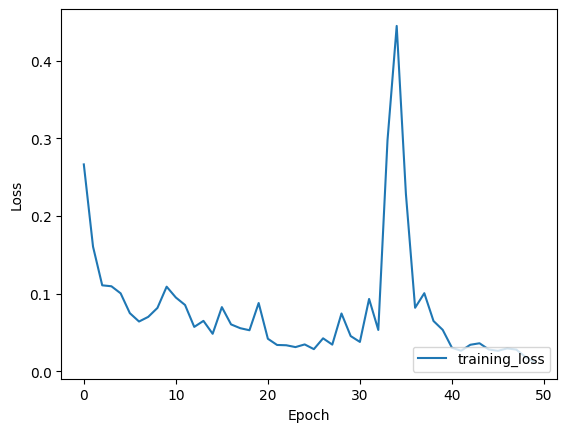

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
# plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

# test_loss, test_acc = resnet_model_dm.evaluate(train_datagen,  path2data, verbose=2)

# binary

flow from directory (สร้าง dataset เก็บแยก)

บอกว่า data อยู่ตรงไหน ดึงมาจากส่วนไหน

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_8 (Conv2D)           (None, 196, 196, 64)         18496     ['conv2d_7[0][0]']            
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_8[0][0]']            
 g2D)                                                                               

In [ ]:
# data Pipeline 2 ส่วน 1. data augmentation 2.ระบุ path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2, #มุม
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

#2.ระบุ path
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=16,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='binary',
        color_mode= 'rgb')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
#label
labels = (train_generator.class_indices)
print(labels)

{'chihuahua': 0, 'muffin': 1}


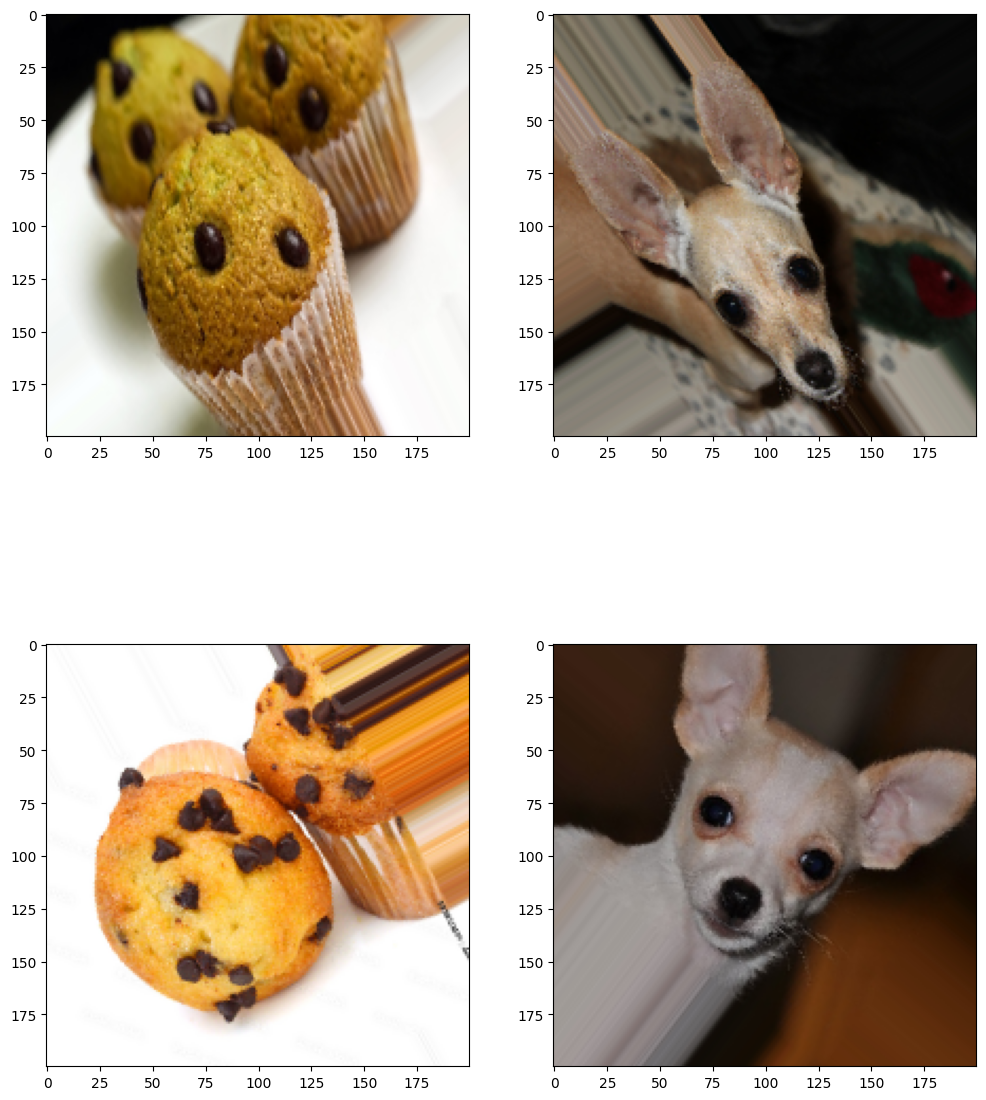

In [ ]:
import cv2
import PIL
from PIL import Image
# load data ที่ผ่านการทำ augmentation มาดู
%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 2
rows = 2
x, y = train_generator.next()
for i in range(0, columns*rows):
    image = x[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()

In [ ]:
train_generator

In [ ]:
path2data

'/content/drive/MyDrive/Classification Dataset'

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet_model_dm.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7, # data ไหล ผ่าน network 7 ครั้ง
      epochs=50,
      verbose=1,
      workers=4)

<ipython-input-35-46099d33b778>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


Epoch 1/50
7/7 [==============================] - 6s 260ms/step - loss: 0.6909 - accuracy: 0.4811
Epoch 2/50
7/7 [==============================] - 2s 226ms/step - loss: 0.6878 - accuracy: 0.5000
Epoch 3/50
7/7 [==============================] - 2s 235ms/step - loss: 0.6914 - accuracy: 0.4906
Epoch 4/50
7/7 [==============================] - 2s 252ms/step - loss: 0.6875 - accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 2s 238ms/step - loss: 0.6823 - accuracy: 0.5189
Epoch 6/50
7/7 [==============================] - 2s 233ms/step - loss: 0.6796 - accuracy: 0.5288
Epoch 7/50
7/7 [==============================] - 2s 271ms/step - loss: 0.6777 - accuracy: 0.5283
Epoch 8/50
7/7 [==============================] - 2s 208ms/step - loss: 0.6640 - accuracy: 0.5481
Epoch 9/50
7/7 [==============================] - 2s 226ms/step - loss: 0.6639 - accuracy: 0.5566
Epoch 10/50
7/7 [==============================] - 2s 235ms/step - loss: 0.6508 - accuracy: 0.5385
Epoch 11/50
7/7 [==

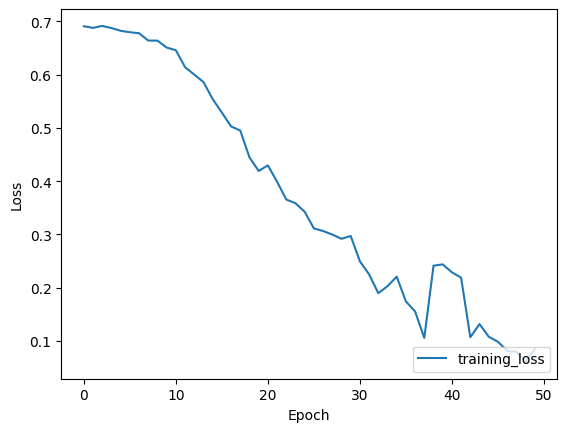

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
# plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

# test_loss, test_acc = resnet_model_dm.evaluate(train_datagen,  path2data, verbose=2)

# binary (ดีละมั้ง)

flow from directory (สร้าง dataset เก็บแยก)

บอกว่า data อยู่ตรงไหน ดึงมาจากส่วนไหน

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_8 (Conv2D)           (None, 196, 196, 64)         18496     ['conv2d_7[0][0]']            
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_8[0][0]']            
 g2D)                                                                               

In [ ]:
# data Pipeline 2 ส่วน 1. data augmentation 2.ระบุ path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1, #มุม
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


#2.ระบุ path
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=16,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='binary',
        color_mode= 'rgb')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
#label
labels = (train_generator.class_indices)
print(labels)

{'chihuahua': 0, 'muffin': 1}


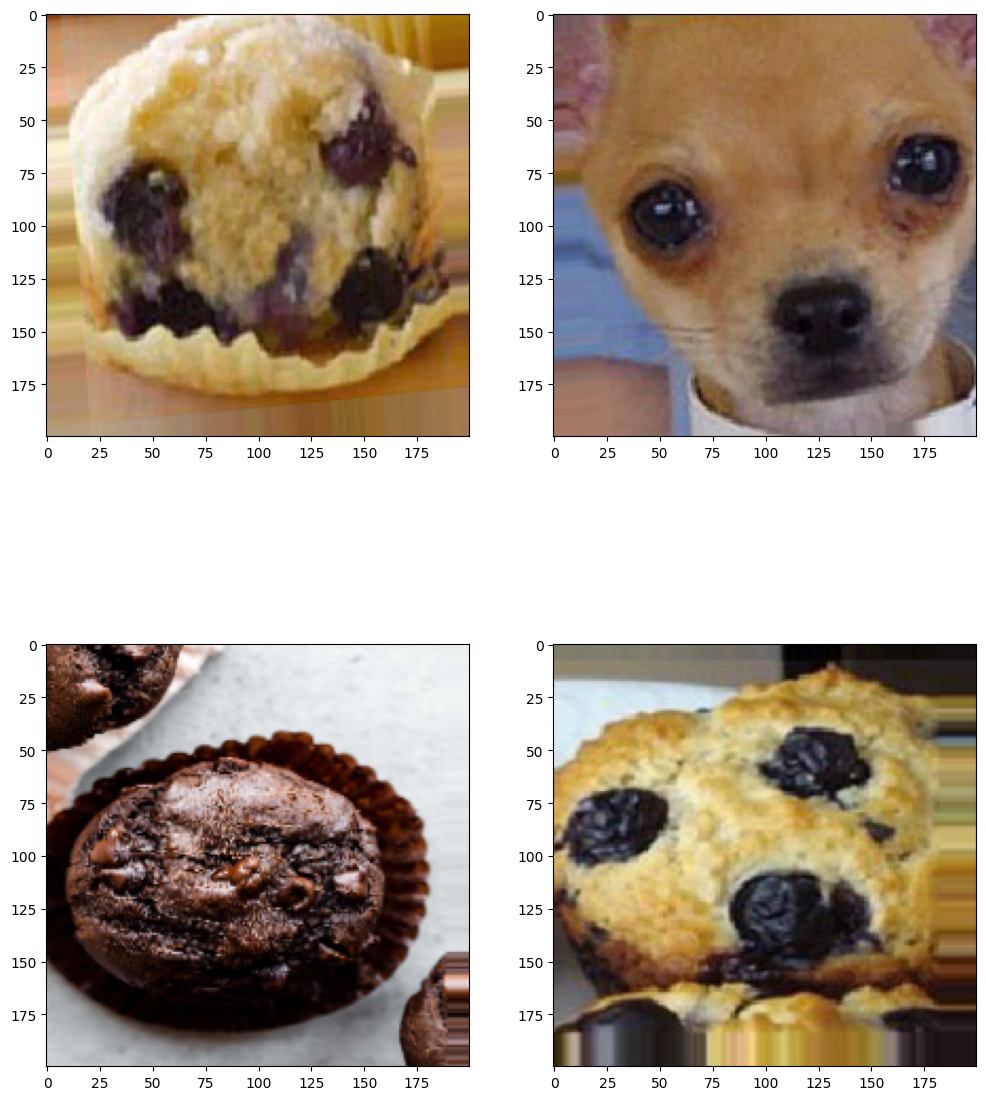

In [ ]:
import cv2
import PIL
from PIL import Image
# load data ที่ผ่านการทำ augmentation มาดู
%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 2
rows = 2
x, y = train_generator.next()
for i in range(0, columns*rows):
    image = x[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()

In [ ]:
train_generator

In [ ]:
path2data

'/content/drive/MyDrive/Classification Dataset'

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet_model_dm.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7, # data ไหล ผ่าน network 7 ครั้ง
      epochs=50,
      verbose=1,
      workers=4)

<ipython-input-44-46099d33b778>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


Epoch 1/50
7/7 [==============================] - 5s 162ms/step - loss: 0.6230 - accuracy: 0.7981
Epoch 2/50
7/7 [==============================] - 2s 233ms/step - loss: 0.2613 - accuracy: 0.8750
Epoch 3/50
7/7 [==============================] - 2s 257ms/step - loss: 0.1980 - accuracy: 0.9245
Epoch 4/50
7/7 [==============================] - 2s 212ms/step - loss: 0.1232 - accuracy: 0.9623
Epoch 5/50
7/7 [==============================] - 2s 199ms/step - loss: 0.0945 - accuracy: 0.9712
Epoch 6/50
7/7 [==============================] - 2s 241ms/step - loss: 0.0882 - accuracy: 0.9717
Epoch 7/50
7/7 [==============================] - 3s 336ms/step - loss: 0.0886 - accuracy: 0.9712
Epoch 8/50
7/7 [==============================] - 3s 277ms/step - loss: 0.0582 - accuracy: 0.9904
Epoch 9/50
7/7 [==============================] - 3s 378ms/step - loss: 0.0638 - accuracy: 0.9906
Epoch 10/50
7/7 [==============================] - 2s 234ms/step - loss: 0.0515 - accuracy: 0.9904
Epoch 11/50
7/7 [==

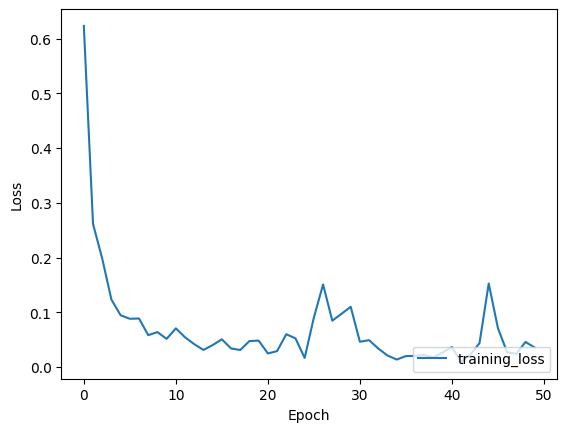

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
# plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

# test_loss, test_acc = resnet_model_dm.evaluate(train_datagen,  path2data, verbose=2)

# binary

flow from directory (สร้าง dataset เก็บแยก)

บอกว่า data อยู่ตรงไหน ดึงมาจากส่วนไหน

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d_7 (Conv2D)           (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_8 (Conv2D)           (None, 196, 196, 64)         18496     ['conv2d_7[0][0]']            
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 65, 65, 64)           0         ['conv2d_8[0][0]']            
 g2D)                                                                               

In [ ]:
# data Pipeline 2 ส่วน 1. data augmentation 2.ระบุ path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)


#2.ระบุ path
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=16,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='binary',
        color_mode= 'rgb')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
#label
labels = (train_generator.class_indices)
print(labels)

{'chihuahua': 0, 'muffin': 1}


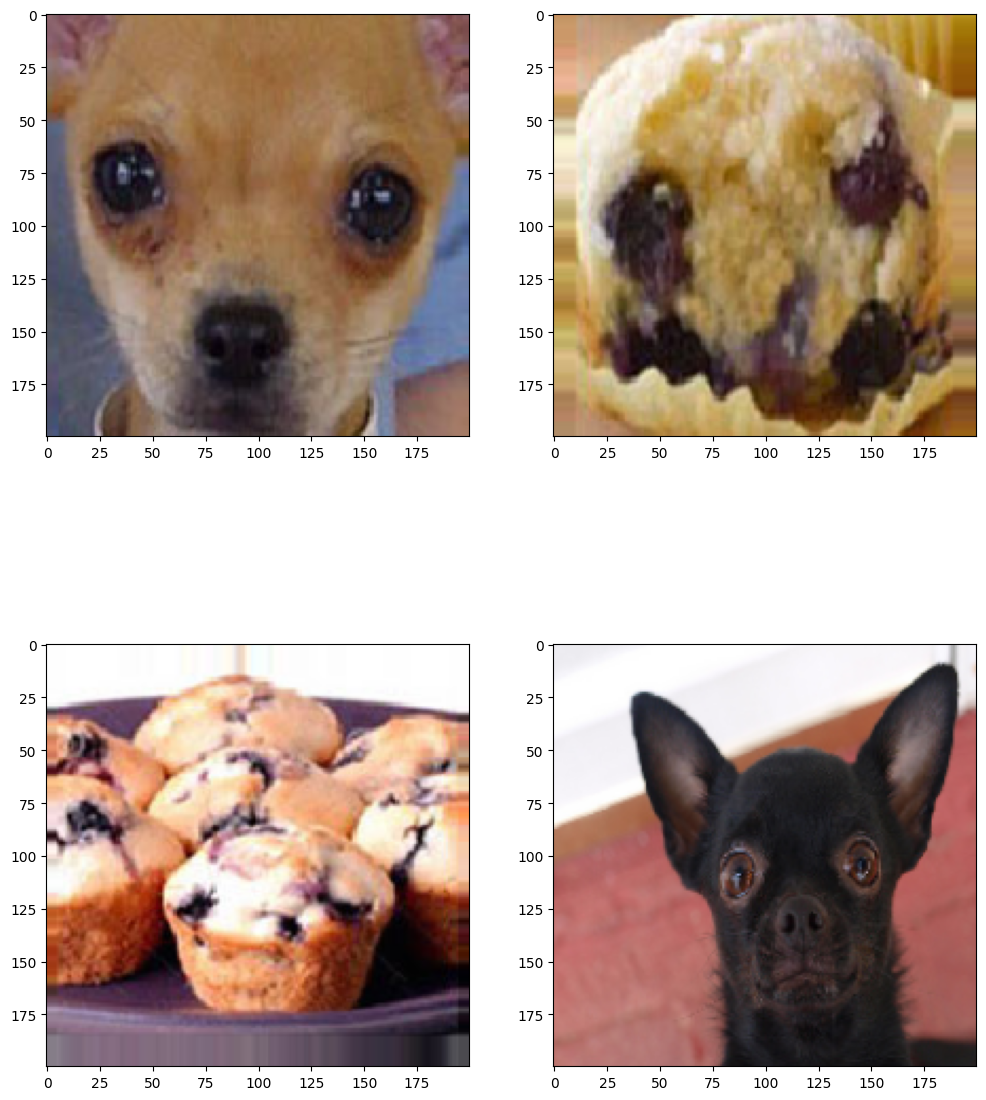

In [ ]:
import cv2
import PIL
from PIL import Image
# load data ที่ผ่านการทำ augmentation มาดู
%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 2
rows = 2
x, y = train_generator.next()
for i in range(0, columns*rows):
    image = x[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()

In [ ]:
train_generator

In [ ]:
path2data

'/content/drive/MyDrive/Classification Dataset'

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet_model_dm.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7, # data ไหล ผ่าน network 7 ครั้ง
      epochs=50,
      verbose=1,
      workers=4)

<ipython-input-54-46099d33b778>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


Epoch 1/50
7/7 [==============================] - 4s 166ms/step - loss: 0.2594 - accuracy: 0.8942
Epoch 2/50
7/7 [==============================] - 2s 206ms/step - loss: 0.1554 - accuracy: 0.9423
Epoch 3/50
7/7 [==============================] - 2s 245ms/step - loss: 0.1095 - accuracy: 0.9423
Epoch 4/50
7/7 [==============================] - 3s 311ms/step - loss: 0.1328 - accuracy: 0.9519
Epoch 5/50
7/7 [==============================] - 2s 216ms/step - loss: 0.0695 - accuracy: 0.9811
Epoch 6/50
7/7 [==============================] - 2s 212ms/step - loss: 0.0351 - accuracy: 0.9904
Epoch 7/50
7/7 [==============================] - 2s 205ms/step - loss: 0.0482 - accuracy: 0.9808
Epoch 8/50
7/7 [==============================] - 2s 220ms/step - loss: 0.0118 - accuracy: 1.0000
Epoch 9/50
7/7 [==============================] - 2s 207ms/step - loss: 0.0244 - accuracy: 1.0000
Epoch 10/50
7/7 [==============================] - 2s 229ms/step - loss: 0.0192 - accuracy: 1.0000
Epoch 11/50
7/7 [==

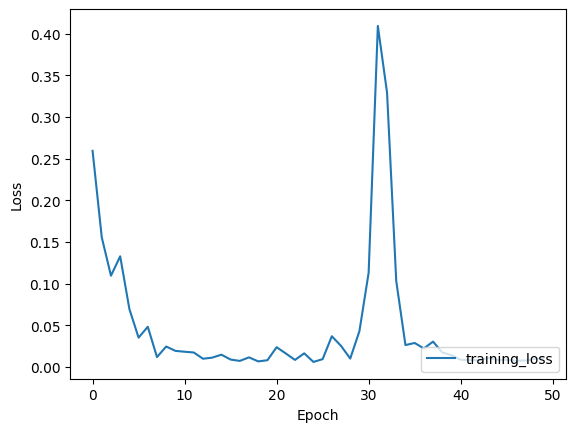

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
# plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

# test_loss, test_acc = resnet_model_dm.evaluate(train_datagen,  path2data, verbose=2)

# binary

flow from directory (สร้าง dataset เก็บแยก)

บอกว่า data อยู่ตรงไหน ดึงมาจากส่วนไหน

In [ ]:
import tensorflow as tf # run
from tensorflow import keras #API / UI
from tensorflow.keras import layers

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [ ]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 img (InputLayer)            [(None, 200, 200, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 198, 198, 32)         896       ['img[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)           (None, 196, 196, 64)         18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 65, 65, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                 

In [ ]:
# data Pipeline 2 ส่วน 1. data augmentation 2.ระบุ path
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1, #มุม
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


#2.ระบุ path
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=16,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='binary',
        color_mode= 'rgb')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [ ]:
#label
labels = (train_generator.class_indices)
print(labels)

{'chihuahua': 0, 'muffin': 1}


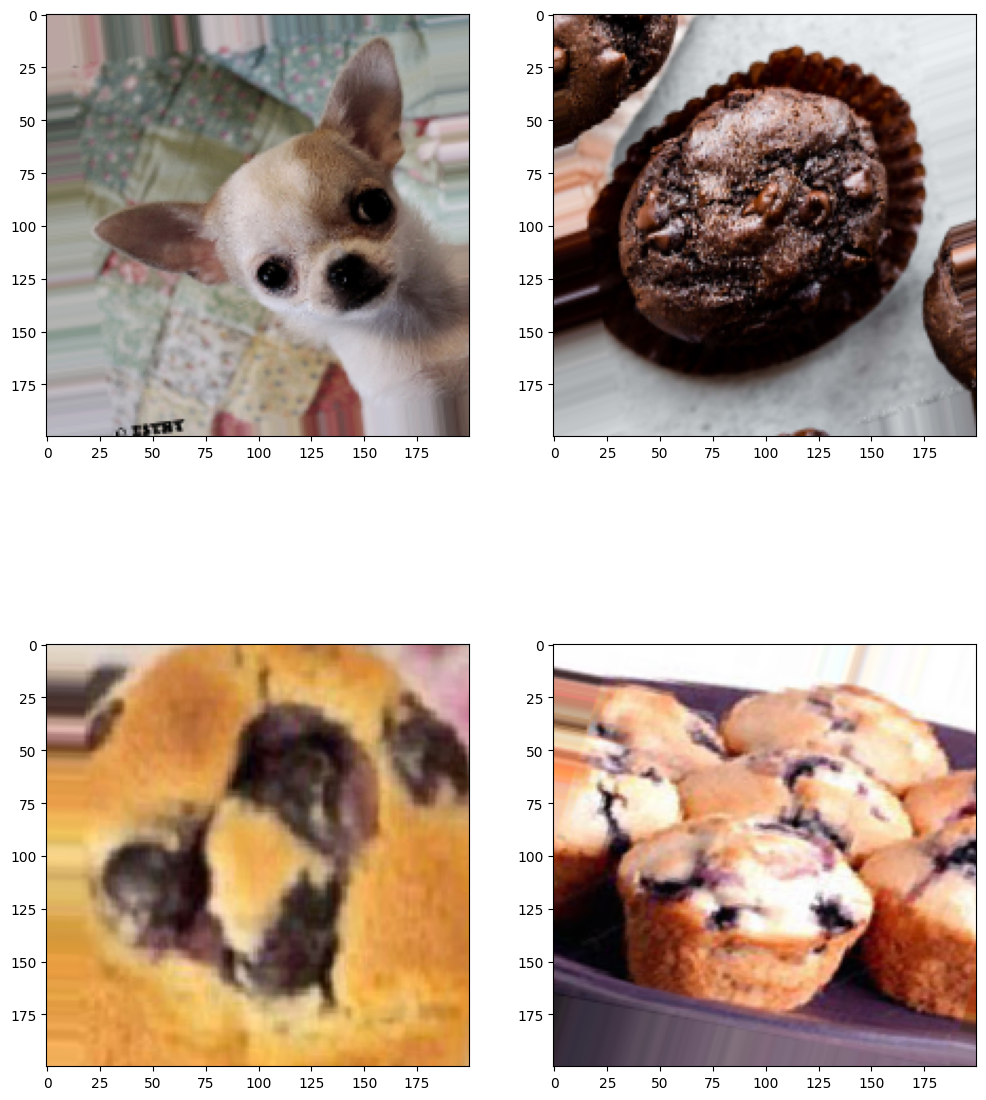

In [ ]:
import cv2
import PIL
from PIL import Image
# load data ที่ผ่านการทำ augmentation มาดู
%matplotlib inline
from matplotlib import pyplot as plt

w = 10
h = 10
fig = plt.figure(figsize=(12, 15))
columns = 2
rows = 2
x, y = train_generator.next()
for i in range(0, columns*rows):
    image = x[i]
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
plt.show()

In [ ]:
train_generator

In [ ]:
path2data

'/content/drive/MyDrive/Classification Dataset'

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
resnet_model_dm.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 2, # data ไหล ผ่าน network 7 ครั้ง
      epochs=50,
      verbose=1,
      workers=4)

<ipython-input-13-8b7e835be7ed>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


Epoch 1/50
2/2 [==============================] - 16s 5s/step - loss: 0.6995 - accuracy: 0.5000
Epoch 2/50
2/2 [==============================] - 7s 3s/step - loss: 0.6922 - accuracy: 0.4333
Epoch 3/50
2/2 [==============================] - 8s 3s/step - loss: 0.6906 - accuracy: 0.5000
Epoch 4/50
2/2 [==============================] - 9s 4s/step - loss: 0.6974 - accuracy: 0.3667
Epoch 5/50
2/2 [==============================] - 7s 3s/step - loss: 0.6873 - accuracy: 0.6667
Epoch 6/50
2/2 [==============================] - 8s 3s/step - loss: 0.7036 - accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 9s 3s/step - loss: 0.7016 - accuracy: 0.4667
Epoch 8/50
2/2 [==============================] - 7s 3s/step - loss: 0.6780 - accuracy: 0.5333
Epoch 9/50
2/2 [==============================] - 9s 3s/step - loss: 0.7089 - accuracy: 0.3667
Epoch 10/50
2/2 [==============================] - 8s 4s/step - loss: 0.6868 - accuracy: 0.5667
Epoch 11/50
2/2 [==============================]

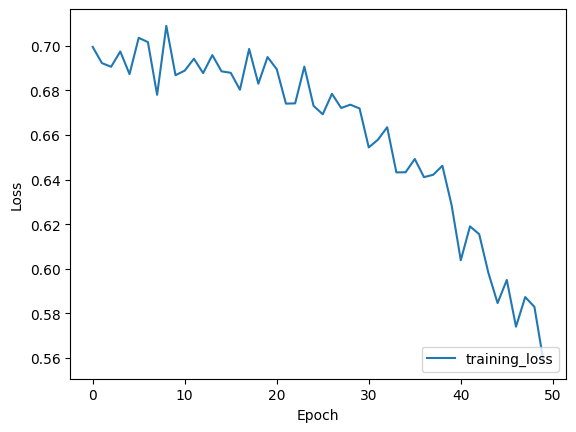

In [ ]:
plt.plot(range(50),history.history['loss'], label='training_loss')
# plt.plot(range(50),history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim()
plt.legend(loc='lower right')

# test_loss, test_acc = resnet_model_dm.evaluate(train_datagen,  path2data, verbose=2)